<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg"  width=400 height=300></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h3 style="text-align: center;"><b> Градиентный спуск. Линейные модели.</b></h3>

В этом ноутбуке мы попробуем реализовать свой градиентный спуск на основе модели линейной регрессии и сравним свою реализацию с 

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext birdseye

In [2]:
# func = lambda x: 0.34*x+13.7+np.random.normal(0, 7)

### Построение модели

Модель нашей линейной решрессии:

In [2]:
%%eye
W = 1
b = None

def mse(preds, y):
    return ((preds - y)**2).mean()

def solve_weights(X, y):
    global W, b
    
    N = X.shape[0]
    bias = np.ones((N, 1))
    X_b = np.append(bias, X, axis=1)
    
    W1 = np.linalg.inv(X_b.T @ X_b)
    W2 = W1 @ X_b.T
    W_full = W2 @ y
    
    W = W_full[1:]
    b = np.array([W_full[0]])
    
def grad_descent(X, y, lr, num_iter=100):
    global W, b
    W = np.random.rand(X.shape[1])
    b = np.array(np.random.rand(1))
    
    losses = []
    
    N = X.shape[0]
    for iter_num in range(num_iter):
        preds = predict(X)
        losses.append(mse(preds, y))
        
        w_grad = np.zeros_like(W)
        b_grad = 0
        for sample, prediction, label in zip(X, preds, y):
            w_grad += 2 * (prediction - label) * sample
            b_grad += 2 * (prediction - label)
            
        W -= lr * w_grad
        b -= lr * b_grad
    return losses

def predict(X):
    global W, b
    return np.squeeze(X@W + b.reshape(-1, 1))

### Получение данных

In [10]:
func = lambda x: (0.34*x+13.7+np.random.normal(0, 7, size=x.shape))
X_train = np.random.random(100) * 150
y_train = func(X_train)

pd.DataFrame({'X': X_train, 'Y': y_train}).head()

,X,Y
0,19.825544,27.773512
1,127.905732,50.753040
2,80.322294,40.738365
3,49.523723,22.030121
4,121.323634,53.430181


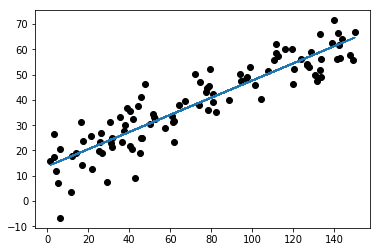

In [4]:
plt.scatter(X_train, y_train, c='black')
plt.plot(X_train, 0.34*X_train+13.7)
plt.show()

In [9]:
y_train = (y_train - y_train.mean()) / y_train.std()

### Решение с помощью линейной алгебры

In [8]:
solve_weights(X_train.reshape(-1, 1), y_train)

KeyError: <frame at 0x0C475030, file '<ipython-input-0-12a053b3a654>', line 8, code solve_weights>

In [7]:
W, b

(None, None)

In [ ]:
plt.scatter(X_test, y_test, c='r')
plt.plot(X_test, 0.34*X_test+13.7)
plt.plot(X_test, np.squeeze(X_test.reshape(-1, 1) @ W + b.reshape(-1, 1)))
plt.show()

### Решение с помощью градиентного спуска

In [ ]:
losses = grad_descent(X_train.reshape(-1, 1), y_train, 1e-9, 15000)

In [17]:
W, b

(array([-0.00338032]), array([0.92082564]))

([<matplotlib.lines.Line2D at 0x7f9dcd31c898>], 0.75998539752222)

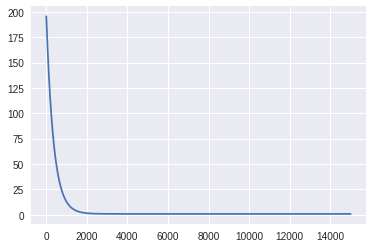

In [19]:
plt.plot(losses), losses[-1]

In [ ]:
plt.scatter(X_test, y_test, c='r')
plt.plot(X_test, 0.34*X_test + 13.7)
plt.plot(X_test, np.squeeze(X_test.reshape(-1, 1) @ W + b.reshape(-1, 1)))
plt.show()

### Данные посложнее

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head()

In [ ]:
data, label = np.array(df)[:, 1:5], np.array(df)[:, 5]

In [ ]:
label = (label - label.mean()) / label.std()

### Решение с помощью линейной алгебры

In [ ]:
solve_weights(data, label)

In [ ]:
W, b

In [ ]:
mse(predict(data), label)

### Решение с помощью градиентного спуска

In [ ]:
losses = grad_descent(data, label, 1e-9, 500)

In [ ]:
W, b

In [ ]:
plt.plot(losses), losses[-1]